In [1]:
#imports
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [7]:
#paths
DATASET_ARCHIVE_PATH = "./data2.csv"
COLUMNS = ["id_review", "rating", "review_title", "review_text", "user_pseudo", "user_location", "hotel_id", "date_stayed", "date_review"]

In [9]:
#load data
df = pd.read_csv(DATASET_ARCHIVE_PATH, sep='\;\;', names=COLUMNS, header=None, error_bad_lines=False)#, compression='zip')

D:\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
Skipping line 50647: Expected 9 fields in line 50647, saw 11. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 71068: Expected 9 fields in line 71068, saw 10. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 73612: Expected 9 fields in line 73612, saw 11. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 104136: Expected 9 fields in line 104136, saw 10. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 122095: Expected 9 fields in line 122095, saw 13. Error could possibly b

In [10]:
df.columns

Index(['id_review', 'rating', 'review_title', 'review_text', 'user_pseudo',
       'user_location', 'hotel_id', 'date_stayed', 'date_review'],
      dtype='object')

In [12]:
df['user_pseudo'].unique()

array(['Papa_Panda', 'Maureen V', 'vuguru', ..., 'Putzi123',
       'DodieLachine', 'mariana2009092'], dtype=object)

In [11]:
df['user_pseudo']

0             Papa_Panda
1              Maureen V
2                 vuguru
3         Hotel-Designer
4              JamesE339
               ...      
878528               NaN
878529            dan016
878530               NaN
878531               NaN
878532          Basajaun
Name: user_pseudo, Length: 878533, dtype: object

In [13]:
df['user_pseudo'].describe()

count        801467
unique       536966
top       Michael S
freq            116
Name: user_pseudo, dtype: object

In [14]:
df['hotel_id'].describe()

count     878526
unique      3986
top       214197
freq        5455
Name: hotel_id, dtype: object

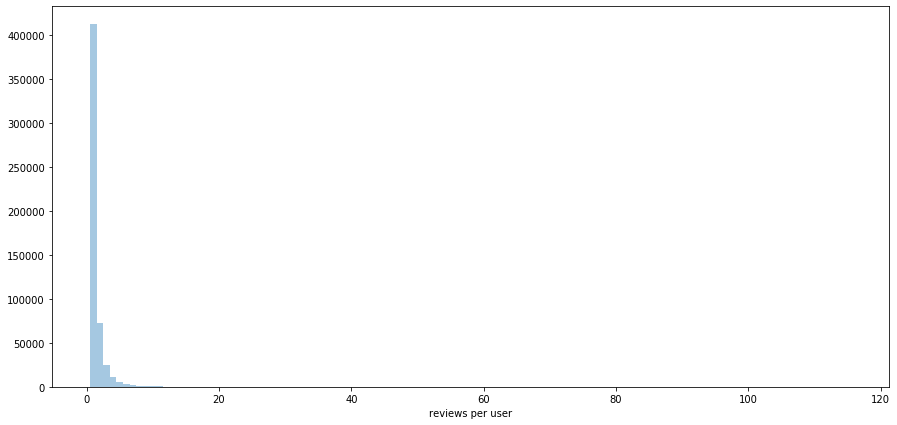

In [30]:
# most users only produce 1 review, so no user-based alignment
plt.figure(figsize=(15,7))
review_user_serie = df.groupby('user_pseudo').apply(len)
review_user_serie.name = "reviews per user"
sns.distplot(review_user_serie, bins=[i+.5 for i in range(review_user_serie.max())], kde = False)
plt.savefig('../imgs/data_2_review_user.png')

In [34]:
review_user_serie.describe()

count    536966.000000
mean          1.492584
std           1.620035
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         116.000000
Name: reviews per user, dtype: float64

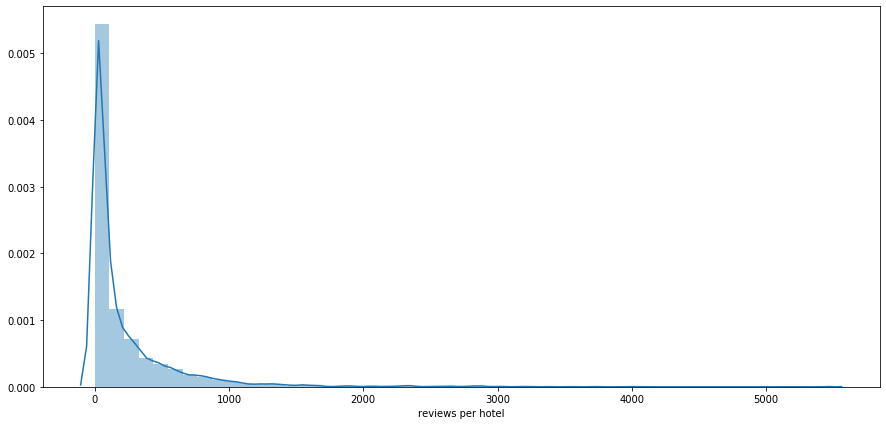

In [33]:
# most users only produce 1 review, so no user-based alignment
plt.figure(figsize=(15,7))
review_hotel_serie = df.groupby('hotel_id').apply(len)
review_hotel_serie.name = "reviews per hotel"
sns.distplot(review_hotel_serie)
plt.savefig('../imgs/data_2_review_hotel.png')

In [17]:
review_hotel_serie.describe()

count    3986.000000
mean      220.402910
std       389.463621
min         1.000000
25%        20.000000
50%        68.000000
75%       255.750000
max      5455.000000
Name: reviews per hotel, dtype: float64

In [18]:
score_matrix = df.groupby('hotel_id')['rating']

In [19]:
score_matrix.describe()

count      mean       std  min   25%  50%   75%  max
hotel_id                                                       
100407      64.0  4.468750  0.776004  1.0  4.00  5.0  5.00  5.0
100504     739.0  4.495264  0.786689  1.0  4.00  5.0  5.00  5.0
100505     644.0  3.739130  1.148516  1.0  3.00  4.0  5.00  5.0
100506      88.0  1.704545  1.007547  1.0  1.00  1.0  2.00  4.0
100507    1049.0  4.734986  0.621134  1.0  5.00  5.0  5.00  5.0
...          ...       ...       ...  ...   ...  ...   ...  ...
;93569       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
;95285       1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0
;99307       2.0  3.500000  0.707107  3.0  3.25  3.5  3.75  4.0
;99476       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0
;99766       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0

[3986 rows x 8 columns]

In [20]:
score_matrix.apply(lambda x: x.data)

D:\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


hotel_id
100407    [5.0, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0, 2.0, 5.0, ...
100504    [5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...
100505    [4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, ...
100506    [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, ...
100507    [5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, ...
                                ...                        
;93569                                                [5.0]
;95285                                                [3.0]
;99307                                           [3.0, 4.0]
;99476                                                [4.0]
;99766                                                [5.0]
Name: rating, Length: 3986, dtype: object

In [22]:
score_matrix.describe().describe()

count         mean          std          min          25%  \
count  3986.000000  3986.000000  3806.000000  3986.000000  3986.000000   
mean    220.402910     3.494653     1.132645     1.196438     2.869732   
std     389.463621     0.887397     0.309119     0.675655     1.147407   
min       1.000000     1.000000     0.000000     0.000000     1.000000   
25%      20.000000     3.009986     0.954369     1.000000     2.000000   
50%      68.000000     3.717914     1.132267     1.000000     3.000000   
75%     255.750000     4.116346     1.302478     1.000000     4.000000   
max    5455.000000     5.000000     2.828427     5.000000     5.000000   

               50%          75%          max  
count  3986.000000  3986.000000  3986.000000  
mean      3.630707     4.294343     4.758404  
std       1.137300     1.021396     0.775785  
min       1.000000     1.000000     1.000000  
25%       3.000000     4.000000     5.000000  
50%       4.000000     5.000000     5.000000  
75%       4.000000     5.000000     5.000000  
max       5.000000     5.000000     5.000000

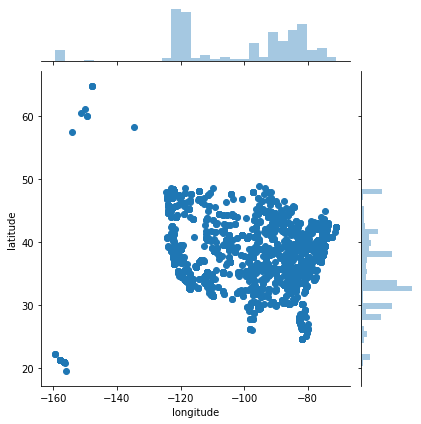

In [72]:
sns.jointplot(x="longitude", y="latitude", data=df)

In [49]:
df['category list'] = df['categories'].apply(lambda x: x.split(','))

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_categories = df[['id']].join(pd.DataFrame(mlb.fit_transform(df['category list']),
                          columns=mlb.classes_,
                          index=df.index))

df_categories

id      Bar   Beach   Casino   Conference Room  \
0     AWE2FvX5RxPSIh2RscTK  0     0       0        0                 0   
1     AVwcj_OhkufWRAb5wi9T  0     0       0        0                 0   
2     AVwcj_OhkufWRAb5wi9T  0     0       0        0                 0   
3     AVwcj_OhkufWRAb5wi9T  0     0       0        0                 0   
4     AVwcj_OhkufWRAb5wi9T  0     0       0        0                 0   
...                    ... ..   ...     ...      ...               ...   
9995  AVwdatg0ByjofQCxo5S5  0     0       0        0                 0   
9996  AVwdatg0ByjofQCxo5S5  0     0       0        0                 0   
9997  AVwdatg0ByjofQCxo5S5  0     0       0        0                 0   
9998  AV1thTgM3-Khe5l_OvT5  0     0       0        0                 0   
9999  AV1tg9C7a4HuVbed8XA5  0     0       0        0                 0   

       Hotel   NY   Resort   and Bar  ...  Wedding Supplies and Services  \
0          0    0        0         0  ...                              0   
1          0    0        0         0  ...                              0   
2          0    0        0         0  ...                              0   
3          0    0        0         0  ...                              0   
4          0    0        0         0  ...                              0   
...      ...  ...      ...       ...  ...                            ...   
9995       0    0        0         0  ...                              0   
9996       0    0        0         0  ...                              0   
9997       0    0        0         0  ...                              0   
9998       0    0        0         0  ...                              0   
9999       0    0        0         0  ...                              0   

      Weekend Getaway Hotels  Wine Country Hotels  food catering  \
0                          0                    0              0   
1                          0                    0              0   
2                          0                    0              0   
3                          0                    0              0   
4                          0                    0              0   
...                      ...                  ...            ...   
9995                       0                    0              0   
9996                       0                    0              0   
9997                       0                    0              0   
9998                       0                    0              0   
9999                       0                    0              0   

      hotels & motels  places  restaurants  travel  travel & transport  \
0                   0       0            0       0                   0   
1                   0       0            0       0                   0   
2                   0       0            0       0                   0   
3                   0       0            0       0                   0   
4                   0       0            0       0                   0   
...               ...     ...          ...     ...                 ...   
9995                0       0            0       0                   0   
9996                0       0            0       0                   0   
9997                0       0            0       0                   0   
9998                0       0            0       0                   0   
9999                0       0            0       0                   0   

      wich Place  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
9995           0  
9996           0  
9997           0  
9998           0  
9999           0  

[10000 rows x 255 columns]

In [54]:
df_categories.columns

Index(['id', '', ' Bar', ' Beach', ' Casino', ' Conference Room', ' Hotel',
       ' NY', ' Resort', ' and Bar',
       ...
       'Wedding Supplies and Services', 'Weekend Getaway Hotels',
       'Wine Country Hotels', 'food catering', 'hotels & motels', 'places',
       'restaurants', 'travel', 'travel & transport', 'wich Place'],
      dtype='object', length=255)

In [55]:
# each id has 1 and only 1 primaryCategories
df['primaryCategories'].describe()

count                             10000
unique                                4
top       Accommodation & Food Services
freq                               9991
Name: primaryCategories, dtype: object

In [58]:
df.groupby('id')['primaryCategories'].nunique().describe()

count    1433.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: primaryCategories, dtype: float64

In [63]:
cols = ['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites']

In [64]:
df[cols[:5]].describe(include='all')

id             dateAdded           dateUpdated  \
count                  10000                 10000                 10000   
unique                  1433                  1341                  1397   
top     AVwcgshl_7pvs4fzv3ge  2015-07-09T04:25:41Z  2019-02-04T09:42:52Z   
freq                     209                   209                   209   

              address           categories  
count           10000                10000  
unique           1432                  631  
top     201 5th Ave N  Hotels Motels,Hotel  
freq              209                 1554

In [65]:
df[cols[5:10]].describe(include='all')

primaryCategories       city country  \
count                           10000      10000   10000   
unique                              4        842       1   
top     Accommodation & Food Services  San Diego      US   
freq                             9991       1189   10000   
mean                              NaN        NaN     NaN   
std                               NaN        NaN     NaN   
min                               NaN        NaN     NaN   
25%                               NaN        NaN     NaN   
50%                               NaN        NaN     NaN   
75%                               NaN        NaN     NaN   
max                               NaN        NaN     NaN   

                                        keys      latitude  
count                                  10000  10000.000000  
unique                                  1433           NaN  
top     us/wa/seattle/2015thaven/-1608096820           NaN  
freq                                     209           NaN  
mean                                     NaN     35.048897  
std                                      NaN      6.390993  
min                                      NaN     19.438604  
25%                                      NaN     29.957700  
50%                                      NaN     33.804844  
75%                                      NaN     39.048210  
max                                      NaN     64.843590

In [66]:
df[cols[10:15]].describe(include='all')

longitude                          name postalCode province  \
count   10000.000000                         10000      10000    10000   
unique           NaN                          1311       1149       46   
top              NaN  Hyatt House Seattle/Downtown      96815       CA   
freq             NaN                           209        305     2647   
mean     -101.619599                           NaN        NaN      NaN   
std        20.158379                           NaN        NaN      NaN   
min      -159.480300                           NaN        NaN      NaN   
25%      -117.888954                           NaN        NaN      NaN   
50%       -95.997600                           NaN        NaN      NaN   
75%       -84.371578                           NaN        NaN      NaN   
max       -71.073340                           NaN        NaN      NaN   

                reviews.date  
count                  10000  
unique                  3370  
top     2016-05-09T00:00:00Z  
freq                      17  
mean                     NaN  
std                      NaN  
min                      NaN  
25%                      NaN  
50%                      NaN  
75%                      NaN  
max                      NaN

In [67]:
df[cols[15:20]].describe(include='all')

reviews.dateAdded      reviews.dateSeen  reviews.rating  \
count                 0.0                 10000    10000.000000   
unique                NaN                   701             NaN   
top                   NaN  2018-12-15T00:00:00Z             NaN   
freq                  NaN                  1067             NaN   
mean                  NaN                   NaN        4.084100   
std                   NaN                   NaN        1.152371   
min                   NaN                   NaN        1.000000   
25%                   NaN                   NaN        4.000000   
50%                   NaN                   NaN        4.000000   
75%                   NaN                   NaN        5.000000   
max                   NaN                   NaN        5.000000   

                                       reviews.sourceURLs reviews.text  
count                                               10000        10000  
unique                                               8228         9770  
top     https://www.tripadvisor.com/Hotel_Review-g5489...     MoreMore  
freq                                                    6           18  
mean                                                  NaN          NaN  
std                                                   NaN          NaN  
min                                                   NaN          NaN  
25%                                                   NaN          NaN  
50%                                                   NaN          NaN  
75%                                                   NaN          NaN  
max                                                   NaN          NaN

In [68]:
df[cols[20:]].describe(include='all')

reviews.title reviews.userCity reviews.userProvince reviews.username  \
count             9999            10000                 9998            10000   
unique            8470             3101                  244             9222   
top     Great location    New York City           California          David W   
freq                49              171                  902                7   

                                               sourceURLs  \
count                                               10000   
unique                                               1433   
top     https://www.tripadvisor.com/Hotel_Review-g6087...   
freq                                                  209   

                                                 websites  
count                                               10000  
unique                                               1327  
top     http://seattledowntown.house.hyatt.com/en/hote...  
freq                                                  209

In [69]:
df['reviews.dateAdded']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: reviews.dateAdded, Length: 10000, dtype: float64

In [ ]:
# all are from US

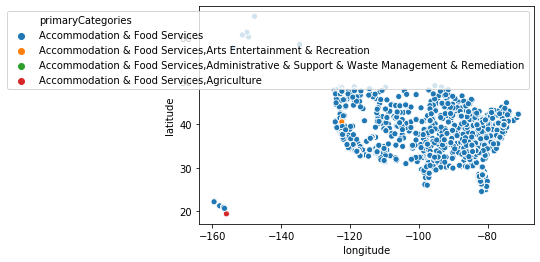

In [73]:
sns.scatterplot(x="longitude", y="latitude", data=df, hue='primaryCategories')

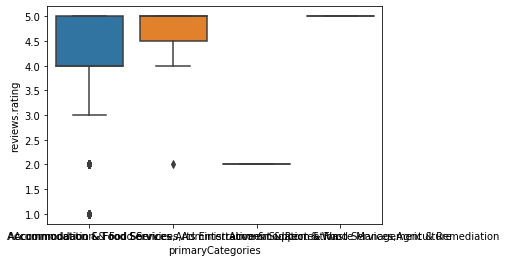

In [78]:
sns.boxplot(x='primaryCategories', y="reviews.rating", data=df)

In [80]:
df['primaryCategories'].unique()

array(['Accommodation & Food Services',
       'Accommodation & Food Services,Arts Entertainment & Recreation',
       'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation',
       'Accommodation & Food Services,Agriculture'], dtype=object)

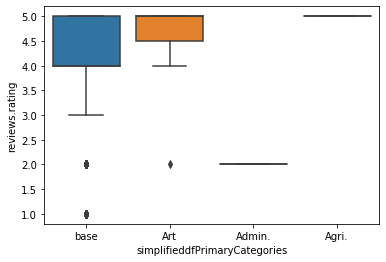

In [82]:
df['simplifieddfPrimaryCategories'] = df['primaryCategories'].apply(lambda x: {
    'Accommodation & Food Services': 'base',
    'Accommodation & Food Services,Arts Entertainment & Recreation': 'Art',
    'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation': 'Admin.',
    'Accommodation & Food Services,Agriculture': 'Agri.'
}[x])
sns.boxplot(x='simplifieddfPrimaryCategories', y="reviews.rating", data=df)

In [84]:
df.groupby('id')[['id', 'simplifieddfPrimaryCategories']].first().groupby('simplifieddfPrimaryCategories').apply(len)

simplifieddfPrimaryCategories
Admin.       1
Agri.        1
Art          2
base      1429
dtype: int64